In [1]:
from framework_pkg.framework import FrameWork
from framework_pkg.framework import bin_prediction, ideal_exposure

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from cobaya.run import run

from matplotlib.ticker import ScalarFormatter

from getdist.mcsamples import MCSamplesFromCobaya
from getdist import plots, MCSamples
import getdist.plots as gdplt

from getdist import loadMCSamples

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['text.usetex']=True
plt.style.use('classic')


Warning!: Python module pyslha not found, disabling slha reading routines


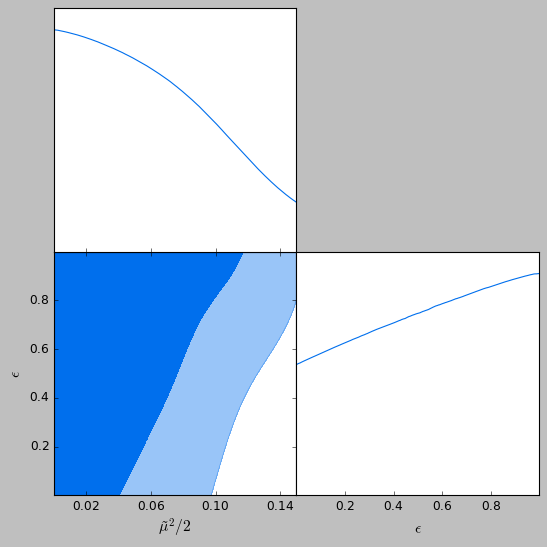

In [2]:
# Filled 2D comparison plot with legend
#gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])


# Path to your Cobaya output folder (replace with your actual path)
output_folder = "output10/run_info"

# Load the MCMC samples
samples = loadMCSamples(output_folder)

# param_names = samples.getParamNames()

# # Fix a specific parameter's LaTeX label (e.g., replace "omegab" with correct LaTeX)
# param_names.setLabels({"mu2" :  "\tilde{\mu}^2/2 "} )
    

# param_names = samples.getParamNames().names
# for p in param_names:
#     if p.name == "mu2":
#         p.label = r"\tilde{\mu}^2/2 "

gdplot = gdplt.get_subplot_plotter(width_inch=7)

gdplot.settings.scaling = False
# gdplot.triangle_plot(samples, ["sint12","m12","mu2", "alpha", "delta_p"], filled=True, 
#                      param_limits={'t12': (0.28, 0.36), 
#                                    'm12': (7, 8),
#                                    'delta': (-0.2, 0.2),
#                                    'mum2': (0, 1.5)
#                                   },lw=2)


gdplot.triangle_plot(samples, ["mu2", "eps"], filled=True,lw=2)
#gdplot.triangle_plot(samples, ["mu2", "alpha","eps","alpha_eps"], filled=True, 
#                    lw=2)

# gdplot.export('./bayes_1_nopriors.pdf')



[ 0.31350312  7.5222081   0.0600793   0.54284799 -0.29833802 -3.44996642
 -3.44996642  1.77696334  1.77696334]


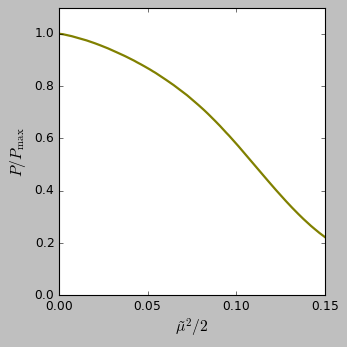

In [3]:
g = plots.get_single_plotter(width_inch=4.5, ratio=1)
g.settings.prob_y_ticks = [0.1,0.3,0.6,0.9]
g.settings.prob_label = r'$P/P_{\rm max}$'
#g.plot_1d([samples],"mu2",lims=[0, 0.1],ls=['-'],lws=2,colors=['olive'])
g.plot_1d([samples],"mu2",lims=[0, 0.15],ls=['-'],lws=2,colors=['olive'])
#g.add_legend(['2020-2021','2012-2013'], legend_loc='upper right')
g.settings.scaling_factor = 1.


mean   = samples.getMeans()

print(mean)

[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]


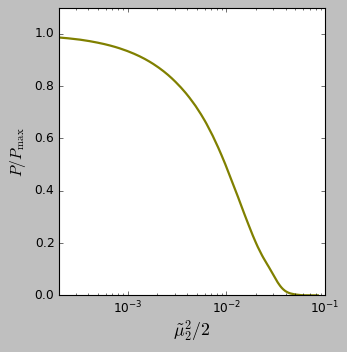

In [ ]:


output_folder = "output3/run_info"

# Load the MCMC samples
samples = loadMCSamples(output_folder)

g = plots.get_single_plotter(width_inch=4.5, ratio=1)
g.settings.prob_y_ticks = [0.1,0.3,0.6,0.9]
g.settings.prob_label = r'$P/P_{\rm max}$'
g.plot_1d([samples],"mu2",lims=[5e-3, 0.05],ls=['-'],lws=2,colors=['olive'])
#g.add_legend(['2020-2021','2012-2013'], legend_loc='upper right')
g.settings.scaling_factor = 1.



# # Access the underlying matplotlib axes to modify ticks
ax = g.fig.axes[0]  # Get the current axes
ax.set_xscale('log')

current_ticks = ax.get_xticks() 



print(current_ticks)



#ax.set_xlabel(r'$\mu_2[\rm \ GeV^{-1} ]$', fontsize=16)
ax.set_xlabel(r'$\tilde{\mu}^2_2/2$', fontsize=16)

#log_ticks = [1.8e-4, 1.8e-2]


# Compute labels: √(2e-7/0.036 × x) for each tick
#new_labels = [f"{1e-7*np.sqrt(2/ 0.036 * x):.1e}" for x in log_ticks]
new_labels = [f"{np.sqrt(2/ 0.036 * x):.1e}" for x in current_ticks]


#new_labels = [r'$10^{-8}$', r'$ 10^{-7}$']





# formatter = ScalarFormatter(useMathText=True)
# formatter.set_scientific(True)
# #formatter.set_powerlimits((0, 0))  # Always use sci notation
# ax.xaxis.set_major_formatter(formatter)

# Apply ticks and labels
#ax.set_xticks(log_ticks)
ax.set_xticks(current_ticks)
ax.set_xlim(2e-4,1e-1)
#ax.set_xlim(2.7e-2,0.1)
#ax.set_ylim(0,0.1)


new_labels = [r'$2.4\times 10^{-8}$',r'$2.4\times 10^{-8}$', r'$ 7.5\times 10^{-8}$', r'$ 2.4\times 10^{-7}$',r'$ 2.4\times 10^{-7}$']
#ax.set_xticklabels(new_labels, fontsize=15)


# new_ticks = np.sqrt(2e-7/0.036 * current_ticks)
# ax.set_xticks(current_ticks)
# ax.set_xticklabels([f"{val:.2e}" for val in new_ticks])


# #ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
# # Optionally rotate x-tick labels if needed
# #ax.tick_params(axis='x', rotation=45)  

# Adjust layout to prevent label cutoff
g.fig.tight_layout()


# #g.settings.axes_fontsize=12
g.export('posteriors_tot2.pdf')

In [ ]:
#best fit and covariance matrix and errors
mean   = gd_sample.getMeans()
covmat = gd_sample.getCovMat().matrix[:, :]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
print('####################')

stats = gd_sample.getMargeStats()
lims1 = stats.parWithName('t12').limits
lims2 = stats.parWithName('mum2').limits
lims3 = stats.parWithName('m12').limits
lims4 = stats.parWithName('delta').limits

for conf, lim1, lim2, lim3, lim4 in zip(gd_sample.contours, lims1,lims2,lims3,lims4):
    print('t12 %s%% lower: %.1f upper: %.1f (%s)'%(conf, lim1.lower, lim1.upper, lim1.limitType()))
    print('mum2 %s%% lower: %.2f upper: %.2f (%s)'%(conf, lim2.lower, lim2.upper, lim2.limitType()))
    print('m12 %s%% lower: %.2f upper: %.2f (%s)'%(conf, lim3.lower, lim3.upper, lim3.limitType()))
    print('delta %s%% lower: %.2f upper: %.2f (%s)'%(conf, lim3.lower, lim3.upper, lim3.limitType()))
    print('####################')

In [4]:
chi2_samp_hi = np.loadtxt('output8_9/run_info.1.txt')
chi2_samp_lo = np.loadtxt('output8_91/run_info.1.txt')
chi2_samp_me = np.loadtxt('output8_7/run_info.1.txt')


chi2_samp = np.loadtxt('output10/run_info.1.txt')
print(chi2_samp_hi.shape)
print(chi2_samp_lo.shape)
print(chi2_samp.shape)


print(np.min(chi2_samp[:,1]))
print(np.min(chi2_samp_hi[:,1]))
print(np.min(chi2_samp_lo[:,1]))

(3481, 14)
(4849, 14)
(8811, 11)
-4.3397928
410.57077
415.12223


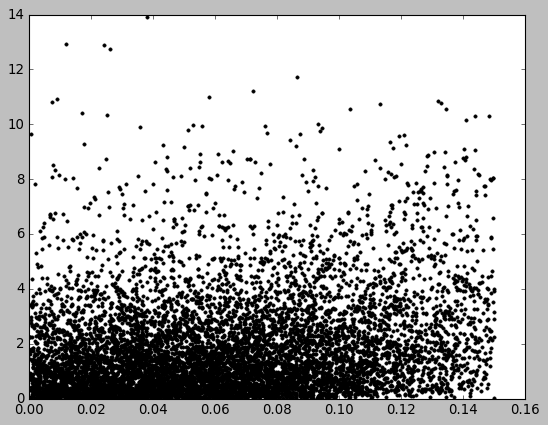

In [16]:
cond = (chi2_samp_hi[:,9] >= 1) & (chi2_samp_hi[:,9] <= 7)
cond_lo = (chi2_samp_lo[:,9] >= 0.7) & (chi2_samp_lo[:,9] <= 3)

plt.rcParams['axes.formatter.useoffset'] = False
#plt.ylim(410,430)

#plt.plot(2 * chi2_samp_hi[cond,9] * 1.31 * 1e-2, chi2_samp_hi[cond,1],'b.')
#plt.plot(2 * chi2_samp_lo[:,9] * 1.31 * 1e-2, chi2_samp_lo[:,1],'b.')


plt.plot(chi2_samp[:,4], chi2_samp[:,9] ,'k.')
#plt.plot(chi2_samp_me[:,4], chi2_samp_me[:,1] ,'r.')
#plt.plot(chi2_samp_hi[cond,4], chi2_samp_hi[cond,1] ,'b.')
#plt.plot(chi2_samp_lo[cond_lo,4], chi2_samp_lo[cond_lo,1] ,'g.')

In [17]:
a = []
for i in range(2,10):
    print(chi2_samp[:,i][chi2_samp[:,1] == np.min(chi2_samp[:,1])])
    #a.append(chi2_samp_lo[cond_lo,i][chi2_samp_lo[cond_lo,1] == np.min(chi2_samp_lo[cond_lo,1])][0])

#print(LogLikelihood(a[0], a[1], a[7], a[2], a[3], a[4], a[5], a[6]))

[0.31009017]
[7.4912686]
[0.02317952]
[0.55611236]
[0.07662879]
[-4.3461754]
[-4.3461754]
[0.01276518]


In [43]:
np.savetxt('./Data/best_fit_8_91.txt',np.array(a).T)

In [ ]:
#the range between 0.7 to 3 must be probed

print(2 * 0.7 * 1.31 * 1e-2)

0.01834
